<a href="https://colab.research.google.com/github/sunnatillo91/ai-datascience/blob/main/DL_Project4_CIFAR_10_Object_Recognation_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os

# Check if kaggle.json exists in the current directory
file_exists = os.path.isfile('kaggle.json')
print(f"kaggle.json exists: {file_exists}")

# List all files in the current directory
current_directory_files = os.listdir('.')
print("Files in the current directory:")
print(current_directory_files)


kaggle.json exists: True
Files in the current directory:
['.config', 'kaggle.json', 'drive', 'sample_data']


In [ ]:
# dataset api
!kaggle competitions download -c cifar-10

 98% 699M/715M [00:06<00:00, 167MB/s]
100% 715M/715M [00:06<00:00, 109MB/s]


In [ ]:
# extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [ ]:
!ls

cifar-10.zip  kaggle.json  sampleSubmission.csv  train.7z
drive	      sample_data  test.7z		 trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.1 MB/s eta 0:00:00


In [ ]:
import py7zr
py7zr.SevenZipFile('/content/train.7z', 'r').extractall(path='/content/train')

## Importing the dependencies

In [ ]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
filenames = os.listdir('/content/train/train/')

In [ ]:
type(filenames)

list

In [ ]:
len(filenames)

50000

In [ ]:
print(filenames[0:5])
print(filenames[-5:])

['15641.png', '25856.png', '14193.png', '31584.png', '12209.png']
['3623.png', '16565.png', '14459.png', '12.png', '22651.png']


In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
labels_df.shape

(50000, 2)

In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df[labels_df['id'] == 7796]

,id,label
7795,7796,frog


In [ ]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [ ]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


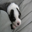

In [ ]:
# display sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/train/45888.png')
cv2_imshow(img)

# sample_image = mpimg.imread('/content/train/train/45888.png')
# plt.imshow(sample_image)

In [ ]:
labels_df[labels_df['id'] == 45888]

,id,label
45887,45888,dog


In [ ]:
id_list = list(labels_df['id'])

## Image processing

In [ ]:
# convert images to numpy
train_data_folder = '/content/train/train/'
data = []

for id in id_list:
  filename = str(id) + '.png'
  img = Image.open(train_data_folder + filename)
  img = np.array(img)
  data.append(img)

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
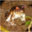

In [ ]:
data[0]

In [ ]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


## Train test split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [ ]:
# scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

## Building the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layers of Neural network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

In [ ]:
# compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# training the neural network

model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 4ms/step - loss: 1.9455 - acc: 0.2908 - val_loss: 1.8633 - val_acc: 0.3325
Epoch 2/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.8204 - acc: 0.3465 - val_loss: 1.7718 - val_acc: 0.3598
Epoch 3/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7845 - acc: 0.3559 - val_loss: 1.7322 - val_acc: 0.3720
Epoch 4/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7619 - acc: 0.3683 - val_loss: 1.7725 - val_acc: 0.3640
Epoch 5/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.7494 - acc: 0.3703 - val_loss: 1.7226 - val_acc: 0.3700
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7368 - acc: 0.3731 - val_loss: 1.7123 - val_acc: 0.3805
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7223 - acc: 0.3778 - val_loss: 1.7257 - val_acc: 0.3677
Epoch 8/10
1125/1125 [==============================] - 3s 3ms

## ResNet50

In [ ]:
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers

In [ ]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [ ]:
num_of_classes = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1125/1125 [==============================] - 476s 390ms/step - loss: 1.7345 - acc: 0.4328 - val_loss: 0.7452 - val_acc: 0.7928
Epoch 2/10
1125/1125 [==============================] - 449s 399ms/step - loss: 0.9316 - acc: 0.7131 - val_loss: 0.3681 - val_acc: 0.8992
Epoch 3/10
1125/1125 [==============================] - 443s 393ms/step - loss: 0.6271 - acc: 0.8247 - val_loss: 0.3113 - val_acc: 0.9137
Epoch 4/10
1125/1125 [==============================] - 449s 399ms/step - loss: 0.4470 - acc: 0.8844 - val_loss: 0.2303 - val_acc: 0.9323
Epoch 5/10
1125/1125 [==============================] - 449s 399ms/step - loss: 0.3324 - acc: 0.9171 - val_loss: 0.2305 - val_acc: 0.9327
Epoch 6/10
1125/1125 [==============================] - 450s 400ms/step - loss: 0.2417 - acc: 0.9421 - val_loss: 0.2301 - val_acc: 0.9370
Epoch 7/10
1125/1125 [==============================] - 442s 393ms/step - loss: 0.1837 - acc: 0.9575 - val_loss: 0.2243 - val_acc: 0.9388
Epoch 8/10
1125/1125 [============

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 38s 116ms/step - loss: 0.2593 - acc: 0.9388
Test Loss: 0.2592572271823883
Test Accuracy: 0.9387999773025513


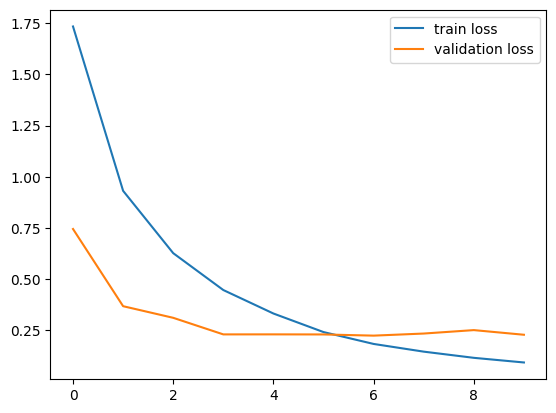

<function matplotlib.pyplot.show(close=None, block=None)>

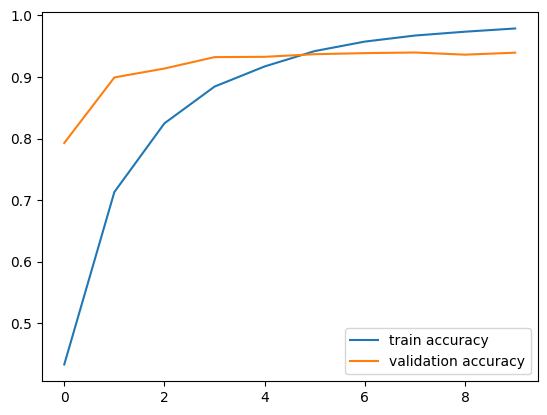

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show

In [ ]:
import joblib

filename = '/content/drive/MyDrive/Deep_learning/Image_predict_model.pkl'
joblib.dump(RF_model, filename)